In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression

%matplotlib inline
# %matplotlib notebook
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [6, 3]

In [4]:
def plot_scatter(stat, ax, xcolumn, ycolumn):    
    ax.scatter(stat[xcolumn].values, stat[ycolumn].values)
    ax.plot(stat[xcolumn], linear_regression(stat, xcolumn, ycolumn), color='red')

    ax.set_xlabel(xcolumn, fontsize=12)
    ax.set_ylabel(ycolumn, fontsize=12)
    
    ax.hlines(0, stat[xcolumn].min(), stat[xcolumn].max(), linestyles='dashed', alpha=0.3)

In [5]:
def linear_regression(data, x_name, y_name):
    X = data.loc[:, x_name].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.loc[:, y_name].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression().fit(X, Y)  # create object for the class
    print(f'r_sqr value: {linear_regressor.score(X, Y)}')
    return linear_regressor.predict(X)

In [6]:
path = '/Users/berg/Projects/Atto/moc_imbalance_flip/data/positions'

In [7]:
cwd = os.getcwd()
df = pd.read_csv(path + '/hold_60000_volume_2000000_spread_0.2_deltaimb_1_date_2020-11-18.csv', index_col=0)#, parse_dates=True)
df.head()

,date,moc_date,symbol,volume,start,stop,initial_imb,paired_imb,direction,open_price,...,position_size,position_size_bp,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,delta_move,delta_move_pct,position_pnl_bp,position_pnl
0,2020-02-03,2020-02-04,ABBV,7916750,2020-02-03 15:55:00,2020-02-03 15:56:00,9467,777818,Long,82.22,...,500,500.000000,1,-3.729750,0.119582,3.849332,0.05,0.060812,25.000000,25.00
1,2020-02-03,2020-02-04,ABEV,15315378,2020-02-03 15:59:36,2020-02-03 16:00:00,-111744,270056,Short,4.12,...,407533,12135.922330,1,0.860873,-0.729620,-1.590493,-0.01,-0.242718,-121.359223,-4075.33
2,2020-02-03,2020-02-04,ACM,1262740,2020-02-03 15:55:00,2020-02-03 15:56:00,12513,380765,Long,47.64,...,803,803.000000,1,-0.533443,0.990940,1.524383,0.01,0.020991,8.030000,8.03
3,2020-02-03,2020-02-04,ACN,1880650,2020-02-03 15:55:00,2020-02-03 15:56:00,33215,330947,Long,207.69,...,340,240.743416,1,-3.335230,1.766145,5.101375,-0.02,-0.009630,-4.814868,-6.80
4,2020-02-03,2020-02-04,ADM,2913957,2020-02-03 15:59:07,2020-02-03 16:00:00,1785,423259,Long,44.98,...,3599,1111.605158,1,-1.132995,0.061257,1.194252,-0.02,-0.044464,-22.232103,-71.98


## Data overview

In [8]:
df.describe()

,volume,initial_imb,paired_imb,open_price,spread_at_open,close_price,spread_at_close,position_size,position_size_bp,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,delta_move,delta_move_pct,position_pnl_bp,position_pnl
count,1.839700e+04,1.839700e+04,1.839700e+04,18397.000000,18397.000000,18397.000000,18397.000000,1.839700e+04,18397.000000,18397.000000,1.839700e+04,1.839700e+04,1.839700e+04,1.839700e+04,1.839700e+04,1.839700e+04,1.839700e+04
mean,4.976532e+06,6.798741e+02,6.550178e+05,51.883721,0.021980,51.883579,0.012564,1.402954e+04,2564.205034,2.675001,NaN,NaN,NaN,4.645605e-03,-3.423325e-02,-1.266928e+01,-9.550557e+01
std,6.372828e+06,1.461589e+05,1.634591e+06,55.689958,0.027392,55.689060,0.029913,5.828751e+04,6761.593170,4.297406,NaN,NaN,NaN,1.641116e-01,3.704323e-01,1.199007e+02,8.179850e+02
min,0.000000e+00,-4.591336e+06,0.000000e+00,0.120000,0.010000,0.130000,-0.660000,1.000000e+00,1.000000,1.000000,-inf,-inf,-inf,-2.970000e+00,-1.047368e+01,-3.975535e+03,-3.253792e+04
25%,2.096450e+06,-2.658100e+04,1.561190e+05,14.800000,0.010000,14.810000,0.000000,3.970000e+02,320.000000,1.000000,-9.714219e-01,-8.504376e-01,-1.811392e+00,-3.000000e-02,-1.152738e-01,-3.915000e+01,-5.988000e+01
50%,3.272747e+06,-1.280000e+02,3.021850e+05,33.240000,0.010000,33.250000,0.010000,1.297000e+03,945.358291,1.000000,3.343209e-03,-4.440639e-03,-1.003163e+00,-8.881784e-16,-1.797932e-14,-7.476249e-12,-8.038104e-11
75%,5.485268e+06,2.738400e+04,6.036660e+05,66.060000,0.020000,66.090000,0.010000,6.044000e+03,2698.327037,2.000000,9.728777e-01,8.755594e-01,1.814129e+00,3.000000e-02,7.545272e-02,2.008000e+01,2.421000e+01
max,1.385543e+08,3.451568e+06,5.953006e+07,499.180000,0.200000,499.370000,0.670000,1.363849e+06,294117.647059,55.000000,inf,inf,inf,4.280000e+00,6.331471e+00,3.165736e+03,2.683076e+04


Some zero values in column `volume` even though we have filtered on the query level over `DailyShares` - average volume more than 2 mln shares. Drop these rows.

In [9]:
df = df[df['volume']>0]
df.describe()

,volume,initial_imb,paired_imb,open_price,spread_at_open,close_price,spread_at_close,position_size,position_size_bp,reverse_count,imbBeforeReversePct,imbAfterReversePct,deltaImbPct,delta_move,delta_move_pct,position_pnl_bp,position_pnl
count,1.837000e+04,1.837000e+04,1.837000e+04,18370.000000,18370.000000,18370.000000,18370.000000,1.837000e+04,18370.000000,18370.000000,18370.000000,18370.000000,18370.000000,1.837000e+04,1.837000e+04,1.837000e+04,1.837000e+04
mean,4.983847e+06,6.675557e+02,6.559117e+05,51.944277,0.021971,51.944132,0.012550,1.404061e+04,2562.787354,2.677463,-0.122325,0.075230,0.197555,4.703059e-03,-3.365981e-02,-1.256311e+01,-9.539785e+01
std,6.374651e+06,1.462622e+05,1.635621e+06,55.705631,0.027370,55.704736,0.029904,5.832663e+04,6764.537121,4.300083,7.506272,4.385699,9.849328,1.642079e-01,3.694567e-01,1.198441e+02,8.183874e+02
min,1.125830e+05,-4.591336e+06,0.000000e+00,0.120000,0.010000,0.130000,-0.660000,1.000000e+00,1.000000,1.000000,-826.165919,-53.923850,-108.393915,-2.970000e+00,-1.047368e+01,-3.975535e+03,-3.253792e+04
25%,2.100965e+06,-2.664725e+04,1.565902e+05,14.872500,0.010000,14.852500,0.000000,3.962500e+02,320.000000,1.000000,-0.969371,-0.850375,-1.811268,-3.000000e-02,-1.148907e-01,-3.909826e+01,-5.980000e+01
50%,3.278201e+06,-1.380000e+02,3.027420e+05,33.290000,0.010000,33.300000,0.010000,1.296000e+03,945.089792,1.000000,0.003916,-0.004940,-1.003525,-2.220446e-16,-1.156036e-14,-3.415490e-12,-3.415490e-12
75%,5.488139e+06,2.739800e+04,6.041848e+05,66.202500,0.020000,66.195000,0.010000,6.047000e+03,2696.871629,2.000000,0.972438,0.872571,1.812005,3.000000e-02,7.548238e-02,2.017228e+01,2.435000e+01
max,1.385543e+08,3.451568e+06,5.953006e+07,499.180000,0.200000,499.370000,0.670000,1.363849e+06,294117.647059,55.000000,81.669285,381.543117,827.447462,4.280000e+00,6.331471e+00,3.165736e+03,2.683076e+04


array([[<AxesSubplot:title={'center':'volume'}>,
        <AxesSubplot:title={'center':'deltaImbPct'}>,
        <AxesSubplot:title={'center':'spread_at_open'}>],
       [<AxesSubplot:title={'center':'position_size_bp'}>,
        <AxesSubplot:title={'center':'delta_move'}>,
        <AxesSubplot:title={'center':'position_pnl_bp'}>]], dtype=object)

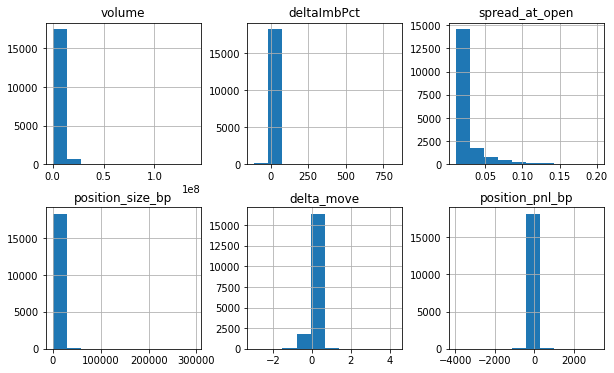

In [10]:
df.hist(column=['volume', 'deltaImbPct', 'spread_at_open', 'position_size_bp', 'delta_move', 'position_pnl_bp'], layout=(2,3), figsize=(10,6))

Now min `volume` is more than 100k. It is still far below our threshold at 2 mln. But let's leave it as it is until we can prove some reliable relationship between pnl and volume. 

At least there is `spread_at_open` column which is complementary and far more important and it distributes as expected with max spread at 20 cents. Let's check other important columns. 

The cheapest stock `open_price` was at 12 cents and the most expensive at 499 dollars. 

`deltaImbPct` has some tails but 25 and 75 percentiles are okay.

`deltaMove` which is a proxy of our pnl looks good, from -2.97 to 4.28 dollars. 

`position_size_bp` and `position_size` are subjects for deeper investigation. Max values are equal to 1.3 mln and 300k shares respectively seems a "little bit" risky and may skew our `position_pnl_bp` and `position_pnl` significantly. Before we dive deeper into this analysis, it is worth mentioning how I calculate these columns:
`position_size` is simply Bid/Aks size depending on direction of a position.
`position_size_bp` is *min* value among two: `position_size` or bp (buying power, default 50k) divided by `open_price`. In this case price is proxy for volatility. The assumption is the more expensive stock the higher is volatility. It is true for most cases. But even with this limitation, it seems like we get some outliers that may skew the results as we can see that *mean* `delta_move` is positive and `pnl`s are highly negative. Meaning that **sizing is highly important!**

In [11]:
# Add absolute columns  
df[['abs_deltaImbPct', 'abs_imbBeforeReversePct', 'abs_imbAfterReversePct', 'abs_position_pnl_bp', 'abs_delta_move']] = df[['deltaImbPct', 'imbBeforeReversePct', 'imbAfterReversePct', 'position_pnl_bp', 'delta_move']].apply(lambda column: abs(column), axis=0)

## Price and size analysis

Let's check relation between `position_size_bp` and `position_pnl_bp`. What I expect to see is obviously with the rise of size there is the rise of absolute pnl

r_sqr value: 0.3394726086104327
r_sqr value: 0.24064710430451763


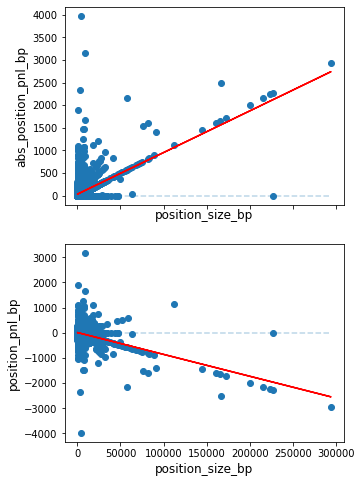

In [12]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(5,8))
plot_scatter(df, ax1, 'position_size_bp', 'abs_position_pnl_bp')
plot_scatter(df, ax2, 'position_size_bp', 'position_pnl_bp')

Wow! From the first scatter plot we realize that there is a relationship between size and pnl. But what is more interesting is that we get a bunch of losses where the `position_size_bp` is more than 50k. This may be due to such *phenomenon as we trade cheap stocks around let's say 1 dollar price and we lose 1 or a few cents which lead to huge losses.* 

What I will do next is to confirm the hypothesis above. I want to find out if cheaper price leads to more negative pnl and vice versa. In other words, I want to see more clearly how the average pnl changes with the size. For that, I will use binning - define the arbitrary number of quantiles and let pandas figure out how to divide up the data. 

In [13]:
# Pnl and size bins
size_groups = 10
df['size_group'] = pd.qcut(df['position_size_bp'], size_groups, labels=list(range(1, size_groups+1)))
df_size_group = pd.DataFrame()
df_size_group['count'] = df.groupby('size_group')['position_pnl_bp'].count()
df_size_group['avg_pnl'] = df.groupby('size_group')['position_pnl_bp'].mean()
df_size_group['sum_pnl'] = df.groupby('size_group')['position_pnl_bp'].sum()
df_size_group['min_size'] = df.groupby('size_group')['position_size_bp'].min()
df_size_group['max_size'] = df.groupby('size_group')['position_size_bp'].max()
df_size_group['quantile10_size'] = df.groupby('size_group')['position_size_bp'].quantile(0.1)
df_size_group['quantile90_size'] = df.groupby('size_group')['position_size_bp'].quantile(0.9)
df_size_group['avg_size'] = df.groupby('size_group')['position_size_bp'].mean()
df_size_group['min_price'] = df.groupby('size_group')['open_price'].min()
df_size_group['max_price'] = df.groupby('size_group')['open_price'].max()
df_size_group['quantile10_price'] = df.groupby('size_group')['open_price'].quantile(0.1)
df_size_group['quantile90_price'] = df.groupby('size_group')['open_price'].quantile(0.9)
df_size_group['avg_price'] = df.groupby('size_group')['open_price'].mean()
df_size_group

,count,avg_pnl,sum_pnl,min_size,max_size,quantile10_size,quantile90_size,avg_size,min_price,max_price,quantile10_price,quantile90_price,avg_price
size_group,,,,,,,,,,,,,
1,1844,2.879141,5309.136410,1.000000,150.000000,32.300000,121.000000,93.185984,0.46,499.18,33.643,214.918,112.445011
2,1830,5.178988,9477.547191,151.000000,272.672738,181.084426,248.000000,207.473590,0.25,327.02,33.769,227.439,117.907710
3,1837,2.312780,4248.577749,273.000000,401.574171,299.976005,400.000000,336.185767,0.17,183.12,26.244,155.008,83.104110
4,1838,1.822222,3349.244055,401.670951,629.000000,422.000000,601.000000,517.547554,0.17,124.48,21.600,104.012,63.874075
5,1836,1.940448,3562.663319,629.009938,945.000000,660.033003,903.000000,782.338792,0.28,79.49,19.835,71.615,47.987206
6,1862,-0.123536,-230.023383,945.179584,1400.000000,991.099926,1360.900000,1177.281409,0.49,52.90,18.054,48.689,35.393695
7,1812,-4.411484,-7993.609539,1400.168020,2146.844139,1454.333915,2062.621211,1743.019347,0.29,35.71,15.042,33.820,25.677848
8,1839,-10.306731,-18954.078301,2148.000000,3410.641201,2247.191011,3234.152652,2718.238409,0.34,23.27,11.544,21.892,17.195421
9,1835,-24.350129,-44682.486776,3412.969283,5700.000000,3584.229391,5319.148936,4436.097538,0.41,14.65,8.504,13.770,10.806796


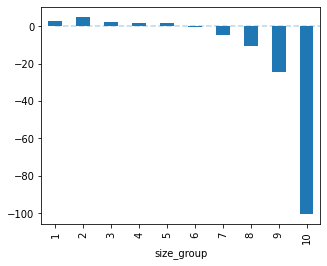

In [14]:
# Plot
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df_size_group['avg_pnl'].plot.bar(ax=ax1)
ax1.hlines(0, 0, 10, linestyles='dashed', alpha=0.3)

There is an equal number of observations/positions in each bin. And that the higher size in cheaper stocks leads to highly negative results. So, let's define our threshold. The first 5 groups are positive on pnl. I will take 90% percentile of size as my upper threshold for volume and 10% percentile of price as my bottom threshold for price.
If we round these numbers we will get: **max_volume = 900** shares and **min_price = 20 dollars**.

In [15]:
# Filter
max_volume = 900 
min_price = 20 
df_filter_vp = df[(df['position_size_bp'] <= max_volume) & (df['open_price'] >= min_price)].copy()

<AxesSubplot:>

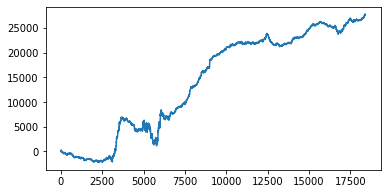

In [16]:
# Plot
fig, ax = plt.subplots(1,1)
df_filter_vp['position_pnl_bp'].cumsum().plot(ax=ax)

In [17]:
sharpe_vp = df_filter_vp['position_pnl_bp'].mean()/df_filter_vp['position_pnl_bp'].std()
print('Sharpe with next filters: max position size {} shares, min price ${} is {}'.format(max_volume, min_price, sharpe_vp))

Sharpe with next filters: max position size 900 shares, min price $20 is 0.04708252847368983


## Imbalance delta analysis

Let's apply same analysis to see if `abs_deltaImbPct`

In [18]:
# Pnl and size bins
imb_groups = 8
df_filter_vp['imb_group'] = pd.qcut(df['abs_deltaImbPct'], imb_groups, labels=list(range(1, imb_groups+1)))
df_imb_group = pd.DataFrame()
df_imb_group['count'] = df_filter_vp.groupby('imb_group')['position_pnl_bp'].count()
df_imb_group['avg_pnl'] = df_filter_vp.groupby('imb_group')['position_pnl_bp'].mean()
df_imb_group['sum_pnl'] = df_filter_vp.groupby('imb_group')['position_pnl_bp'].sum()
df_imb_group['min_size'] = df_filter_vp.groupby('imb_group')['abs_deltaImbPct'].min()
df_imb_group['max_size'] = df_filter_vp.groupby('imb_group')['abs_deltaImbPct'].max()
df_imb_group['quantile10_size'] = df_filter_vp.groupby('imb_group')['abs_deltaImbPct'].quantile(0.1)
df_imb_group['quantile90_size'] = df_filter_vp.groupby('imb_group')['abs_deltaImbPct'].quantile(0.9)

df_imb_group

,count,avg_pnl,sum_pnl,min_size,max_size,quantile10_size,quantile90_size
imb_group,,,,,,,
1,1021,-3.245416,-3313.569979,1.000117,1.119787,1.011212,1.106505
2,1056,-1.157116,-1221.914193,1.120054,1.283195,1.132189,1.263865
3,1068,2.384674,2546.831572,1.283991,1.502186,1.305342,1.477096
4,1081,-0.118828,-128.453099,1.503855,1.811666,1.528658,1.774887
5,1026,1.650784,1693.704648,1.811977,2.282558,1.842466,2.232356
6,1080,2.199509,2375.469661,2.283403,3.062763,2.343639,2.946430
7,1056,9.390150,9915.998396,3.063999,4.912963,3.174607,4.642808
8,1015,15.601299,15835.318885,4.914437,155.659856,5.281031,17.660246


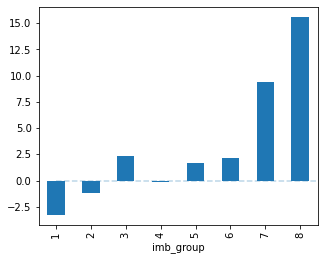

In [19]:
# Plot
fig, (ax1) = plt.subplots(1, 1, figsize=(5,4))
df_imb_group['avg_pnl'].plot.bar(ax=ax1)
ax1.hlines(0, 0, 8, linestyles='dashed', alpha=0.3)

Awesome! Another clear confirmation of our hypothesis. With more significant reversal we get better and better pnl. From group 5 the pnl becomes consistently positive. From group 7 it becomes much better. So, we can take both into consideration. The last one can be more conservative one. Let's define our thresholds for `abs_deltaImbPct`: **min_deltaImbPct = 1.8** and **min_deltaImbPct_conservative = 3**

In [20]:
# Filter
min_deltaImbPct = 1.8
min_deltaImbPct_conservative = 3
df_filter_vpi = df_filter_vp[df_filter_vp['abs_deltaImbPct'] > min_deltaImbPct].copy()
df_filter_vpi_conservative = df_filter_vp[df_filter_vp['abs_deltaImbPct'] > min_deltaImbPct_conservative].copy()

<AxesSubplot:>

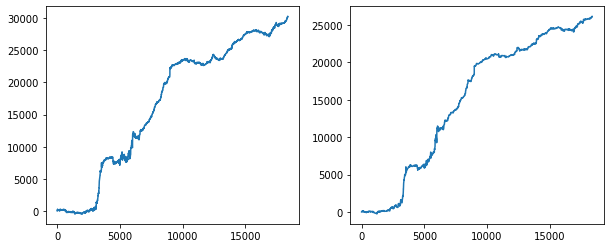

In [21]:
# Plot
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
df_filter_vpi['position_pnl_bp'].cumsum().plot(ax=ax1)
df_filter_vpi_conservative['position_pnl_bp'].cumsum().plot(ax=ax2)

In [22]:
sharpe_vpi = df_filter_vpi['position_pnl_bp'].mean()/df_filter_vpi['position_pnl_bp'].std()
sharpe_vpi_conservative = df_filter_vpi_conservative['position_pnl_bp'].mean()/df_filter_vpi_conservative['position_pnl_bp'].std()
print('Sharpe with next filters: max position size {} shares, min price ${}, min delta imbalance pct {}% is \n{}'.format(max_volume, min_price, min_deltaImbPct, sharpe_vp))
print('Sharpe with next filters: max position size {} shares, min price ${}, min delta imbalance pct {}% is \n{}'.format(max_volume, min_price, min_deltaImbPct_conservative, sharpe_vpi_conservative))

Sharpe with next filters: max position size 900 shares, min price $20, min delta imbalance pct 1.8% is 
0.04708252847368983
Sharpe with next filters: max position size 900 shares, min price $20, min delta imbalance pct 3% is 
0.14562435663911028


## Seasonality analysis

And as a lst part of analysis I want to do seasonality analysis. What I mean is usually on Friday the moc trading is more active due to final trading day of the week and some triple and quadruple witchings. I expect to see higher pnl on average on Fridays.  

In [23]:
df_filter_vpi['timeindex'] = pd.to_datetime(df_filter_vpi['date'])
df_filter_vpi['day_name'] = df_filter_vpi['timeindex'].map(lambda row: row.strftime("%A"))

In [24]:
df_day_group = pd.DataFrame()
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
df_day_group['count'] = df_filter_vpi.groupby('day_name')['position_pnl_bp'].count().reindex(day_names)
df_day_group['avg_pnl'] = df_filter_vpi.groupby('day_name')['position_pnl_bp'].mean().reindex(day_names)
df_day_group['sum_pnl'] = df_filter_vpi.groupby('day_name')['position_pnl_bp'].sum().reindex(day_names)
df_day_group

,count,avg_pnl,sum_pnl
day_name,,,
Monday,971,4.611959,4478.211744
Tuesday,803,9.304547,7471.551194
Wednesday,633,3.018341,1910.610091
Thursday,737,4.732421,3487.794324
Friday,1068,12.027236,12845.087661


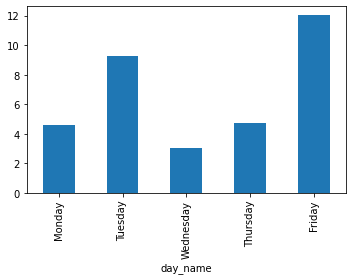

In [25]:
# Plot
fig, ax = plt.subplots(1, 1, figsize=(5,4))
df_day_group['avg_pnl'].plot.bar(ax=ax)
fig.tight_layout()

And again we got the confirmation of hypothesis. Friday seems to be the most active due to number of trades and most profitable day by a wide margin.

In [26]:
# Filter
day_filter = 'Friday'
df_filter_vpid = df_filter_vpi[df_filter_vpi['day_name']==day_filter].copy()

<AxesSubplot:>

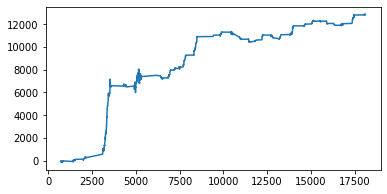

In [27]:
# Plot
fig, ax = plt.subplots(1,1)
df_filter_vpid['position_pnl_bp'].cumsum().plot(ax=ax)

In [28]:
sharpe_vpid = df_filter_vpid['position_pnl_bp'].mean()/df_filter_vpid['position_pnl_bp'].std()
print('Sharpe with next filters: max position size {} shares, min price ${}, min delta imbalance pct {}%, day {} is \n{}'.format(max_volume, min_price, min_deltaImbPct, day_filter, sharpe_vpid))

Sharpe with next filters: max position size 900 shares, min price $20, min delta imbalance pct 1.8%, day Friday is 
0.15952348776075864


And this is another significant improvement of sharpe 0.04708252847368894 vs 0.15952348776075853.

In [29]:
df_filter_vpid_resample = pd.DataFrame()
df_filter_vpid_copy = df_filter_vpid.copy()
df_filter_vpid_copy.set_index('timeindex', inplace=True)
df_filter_vpid_resample['sum'] = df_filter_vpid_copy['position_pnl_bp'].resample('D').sum()
df_filter_vpid_resample['cum_sum'] = df_filter_vpid_resample['sum'].cumsum().fillna(0)

<AxesSubplot:xlabel='timeindex'>

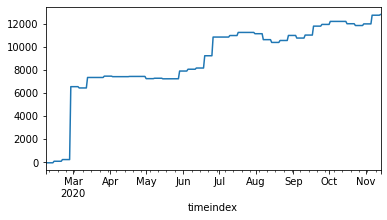

In [30]:
fig, ax = plt.subplots(1, 1)
df_filter_vpid_resample['cum_sum'].plot(ax=ax)